# Lecture 4

## Import Libraries and data

In [25]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('salary.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

## Lets try fitting a linear regression model to it

In [8]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X, y)
y_hat = linear_model.predict(X)

## Lets plot the linear model

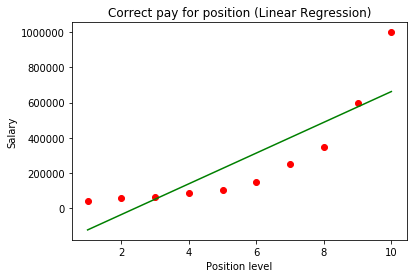

In [23]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, y_hat, color = 'green')
plt.title('Correct pay for position (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Lets now try it for Polynomial regression

In [29]:
# Fitting Polynomial Regression to the dataset
#transform our original data to the original position levels and associated polynomial terms.
from sklearn.preprocessing import PolynomialFeatures
polynomial_feat = PolynomialFeatures(degree = 4)#here we convert our X values into polinomial features to follow the polynomial regression formula
X_polynomial = polynomial_feat.fit_transform(X)

linear_model_2 = LinearRegression()
linear_model_2.fit(X_polynomial, y)
y_hat = linear_model_2.predict(X_polynomial)

In [ ]:
## Lets plot the polynomial regression

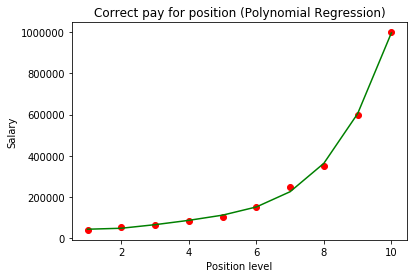

In [30]:
# plotting the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, y_hat, color = 'green')
plt.title('Correct pay for position (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Lets now try the decision tree regression

In [31]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state = 0)
tree_regressor.fit(X, y)
y_hat = tree_regressor.predict(X)


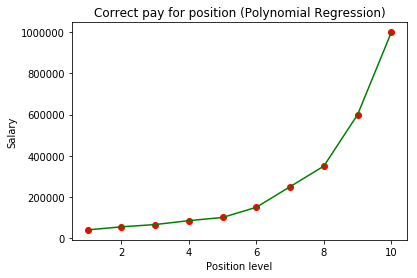

In [32]:
## Lets now plot it:
# plotting the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, y_hat, color = 'green')
plt.title('Correct pay for position (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## This is not how it truly looks... Actually this is because of the plot function... Remember if it falls into the leaf then it will just be the average

## We can visualize it like this:

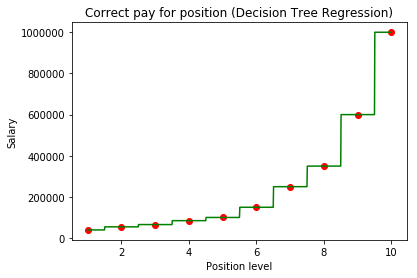

In [34]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
y_hat = tree_regressor.predict(X_grid)
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, y_hat, color = 'green')
plt.title('Correct pay for position (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## we can see it looks like this because it is putting it into leaves

## Lets now try with Random Forest Regression

In [35]:
from sklearn.ensemble import RandomForestRegressor
forest_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
forest_regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

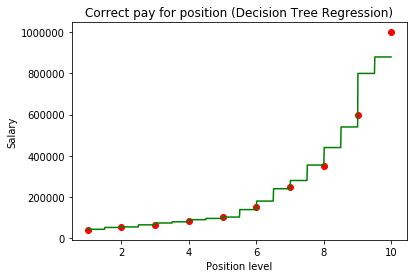

In [36]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
y_hat = forest_regressor.predict(X_grid)
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, y_hat, color = 'green')
plt.title('Correct pay for position (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

#### When using RF regressor we can see that we still get a model that splits the range of levels and gives us the average of the interval, its non continuous. We just get more steps meaning we get more intervals. We get more steps because the range of levels is split into more intervals.